In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

from IPython.display import Audio
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from run_reconstruction import *

data_path = "/home/nobeljpde1/abt/src/abt/data/sounds"
files = os.listdir(data_path)
din026 = "/home/nobeljpde1/abt/fade_projects/din-bruce4/_corpus/train/tripletnoise/snr+10/rep02/026.wav"

def get_spectrogram(y, sr, n_fft, hops):
    S = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_mels=64, 
        fmin=150, 
        fmax=10_500,
        n_fft=n_fft, 
        hop_length=hops
    )

    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

n_mels = 64
min_freq = 150
max_freq = 10_500
mel_scale = librosa.filters.mel_frequencies(n_mels, fmin=min_freq, fmax=max_freq)

In [2]:
files

['IFFM-V1.0_60s_16bit.wav',
 'BobbyBareDropKickMeJesus.wav',
 'tone_1kHz.wav',
 'olnoise.wav',
 'AzBio_3sent_65dBSPL.wav',
 'defineit.wav',
 'trumpet.wav',
 'AzBio_3sent.wav',
 'violin.wav',
 'Choice.wav',
 'robin.wav',
 'sheep.wav',
 'vacuum_cleaner.wav',
 'impulse.wav']

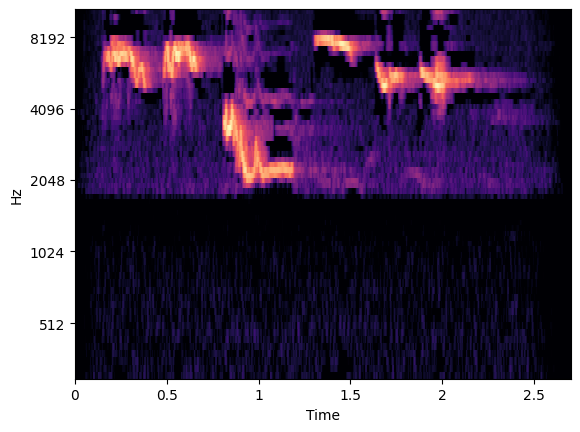

In [3]:
y, sr = librosa.load(librosa.ex('robin'))

n_fft = N_FFT
hops = N_HOP
S_db = get_spectrogram(y, sr, n_fft, hops)
librosa.display.specshow(S_db, x_axis='time',
                         y_axis='mel', sr=sr,
                          fmin=150, fmax=10_500, 
                         n_fft=n_fft, hop_length=hops)

In [4]:
import soundfile as sf

def librosa_ex_to_wav(name = 'robin'):
    tgt = os.path.join(data_path, f"{name}.wav")
    if os.path.isfile(tgt):
        return tgt
    sf.write(tgt, *librosa.load(librosa.ex(name)))
    assert os.path.isfile(tgt)
    return tgt
    
robin_sound = librosa_ex_to_wav()
trumpet_sound = librosa_ex_to_wav('trumpet')

In [5]:
bg = BruceGenerator()
bg(robin_sound)

(array([[2.16338751e-01, 2.16299777e-01, 2.16260928e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.76804945e-01, 1.76844936e-01, 1.76885329e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.27539832e-01, 2.27562079e-01, 2.27584395e-01, ...,
         4.25044622e-08, 1.88910102e-08, 4.72277327e-09],
        ...,
        [3.55135163e-01, 3.55144044e-01, 3.55152531e-01, ...,
         2.36137835e-08, 4.72277327e-09, 0.00000000e+00],
        [1.91359831e-01, 1.91365350e-01, 1.91371129e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.87677169e-01, 1.87647701e-01, 1.87618331e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 3.6e-05,
 150,
 10500,
 64)

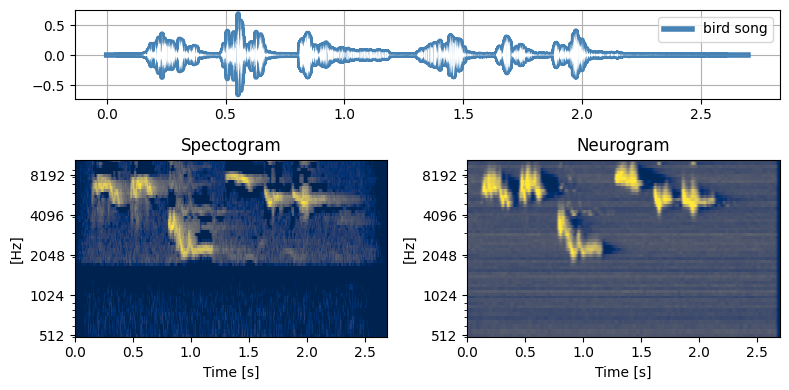

In [6]:
from notebooks import plotting

fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(2, 2,  height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(np.arange(len(y)) * (1/sr), y, label='bird song', color='#4682B4', linewidth=4)
ax1.plot(np.arange(len(y)) * (1/sr), y, color='white', linewidth=.05)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(gs[1, 0])
t = np.arange(S_db.shape[1]) * hops * (1 / sr)
cmap = 'cividis'

ax2.pcolormesh(
    t, bg.mel_scale, S_db, cmap=cmap
)

ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
# t = np.arange(bg.data.shape[1]) * bg.ng.bin_width,

sp_data = np.vstack(
    [
        scipy.signal.resample(bg.data[i], S_db.shape[1])
        for i in range(bg.data.shape[0])
    ]
)

img = ax3.pcolormesh(
    t, bg.mel_scale, sp_data, cmap=cmap
)


# img = ax3.pcolormesh(
#     np.arange(bg.data.shape[1]) * bg.ng.bin_width, bg.mel_scale, bg.data, cmap=cmap
# )
ax2.set_title("Spectogram")
ax3.set_title("Neurogram")

ax2.set_ylabel("[Hz]")
ax2.set_yscale("log")
ax2.set_yticks([pow(2, i) for i in range(9, 14)], [pow(2, i) for i in range(9, 14)])
ax2.set_ylim(500, None)
ax2.set_xlim(0, np.max(t))

# ax1.set_ylabel("amplitude")
ax3.set_ylabel("[Hz]")

for ax in ax2, ax3:
    ax.set_xlabel("Time [s]")
plt.tight_layout()

fig.savefig("bruce_neurogram_robin.png", dpi=1200)


In [7]:

Audio(y, rate=sr)

In [8]:
import phast

In [9]:
tp = phast.threshold_profile.load_df120()

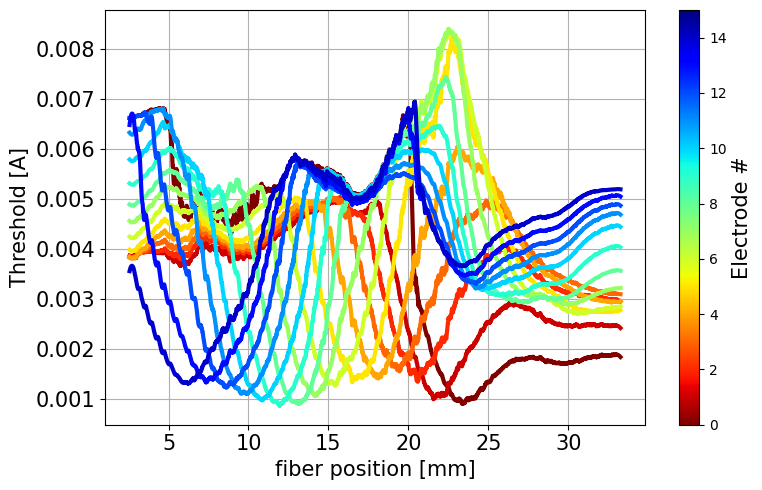

In [10]:
from scipy.signal import savgol_filter
from matplotlib import colors, cm

cmap = plt.cm.jet.reversed()
norm = colors.Normalize(vmin=0, vmax=135/9)

fig, ax = plt.subplots(figsize=(8, 5))
for e in range(0, 135, 9):
    ax.plot(tp.position, savgol_filter(tp.i_det[:, e], 50, 2), color=cmap(norm(e / 9)), linewidth=3)

sm = cm.ScalarMappable(cmap=cmap, norm=norm) 
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Electrode #", size=15)
ax.grid()
ax.set_xlabel("fiber position [mm]", fontsize=15)
ax.set_ylabel("Threshold [A]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
fig.savefig("t_profile.png", dpi=120)


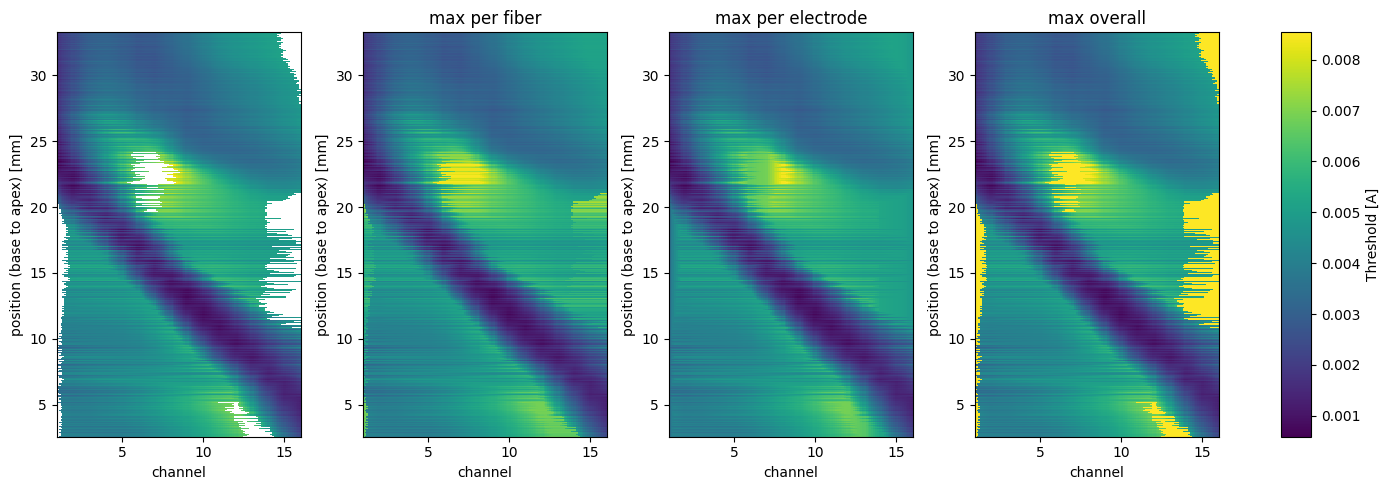

In [11]:
from phast.threshold_profile import *

def load_tp(ft: FiberType = FiberType.HEALTHY, fill=0):
    fname = os.path.join(DATA_DIR, "df120.npy")
    data = np.load(fname, allow_pickle=True).item()
    elec = ElectrodeConfiguration(
        m_level=data["M"][ft.value] * 1e-3,
        t_level=data["T"][ft.value] * 1e-3,
        insertion_angle=data["Ae"][ft.value],
        greenwood_f=data["Fe"][ft.value] * 1e3,
        position=data["Le"][ft.value],
        alpha=data["alpha"][ft.value],
    )
    TIa = data["TIa"][ft.value] * 1e-3
    TIb = data["TIb"][ft.value] * 1e-3
    i_det = TIa + TIb
    i_det = np.flip(i_det[:, : i_det.shape[1], :].reshape(-1, i_det.shape[2]).T, axis=0)

    if fill == 1:
        i_det = np.nan_to_num(i_det, nan=np.nanmax(i_det, axis=1).reshape(-1, 1))
    elif fill == 2:
        i_det = np.nan_to_num(i_det, nan=np.nanmax(i_det, axis=0))
    elif fill == 3:
        i_det = np.nan_to_num(i_det, nan=np.nanmax(i_det))

    tp = ThresholdProfile(
        i_det=i_det,
        electrode=elec,
        angle=np.flip(data["An"][ft.value]),
        position=np.flip(data["Ln"][ft.value]),
        greenwood_f=np.flip(data["Fn"][ft.value] * 1e3),
        fiber_type=ft,
    )
    return tp

fig, axes = plt.subplots(1, 5, figsize=(14, 5), gridspec_kw={'width_ratios': [8, 8, 8, 8, 1]})

for i, ax in enumerate(axes[:4]):
    tp = load_tp(fill=i)
    img = ax.pcolormesh(1 + np.linspace(0, 15, tp.i_det.shape[1]), tp.position, tp.i_det)
    ax.set_xlabel("channel")
    ax.set_ylabel("position (base to apex) [mm]")
    
axes[1].set_title("max per fiber")
axes[2].set_title("max per electrode")
axes[3].set_title("max overall")

fig.colorbar(img, axes[4]).set_label("Threshold [A]")
plt.tight_layout()

/tmp/ipykernel_366013/907821249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  img = ax.pcolormesh(1 + np.linspace(0, 15, tp.i_det.shape[1]), tp.position, tp.i_det, cmap=plt.cm.get_cmap('cividis').reversed())


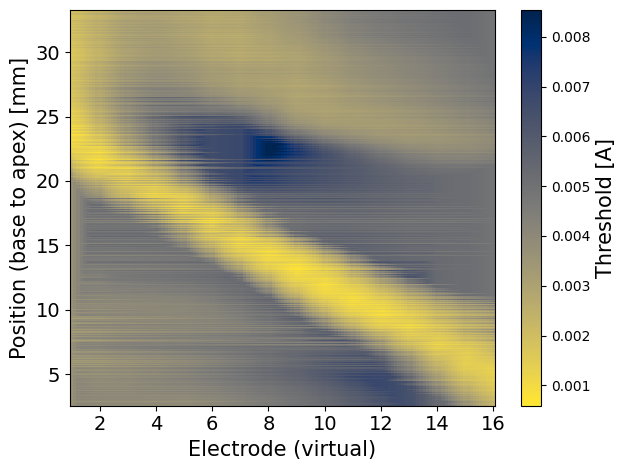

In [12]:
f, ax = plt.subplots()
tp = load_tp(fill=2)

img = ax.pcolormesh(1 + np.linspace(0, 15, tp.i_det.shape[1]), tp.position, tp.i_det, cmap=plt.cm.get_cmap('cividis').reversed())
ax.set_xlabel("Electrode (virtual)", fontsize=15)
ax.set_ylabel("Position (base to apex) [mm]", fontsize=15)
plt.colorbar(img).set_label("Threshold [A]", size=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("heatmap_t_profile.png", dpi=400)


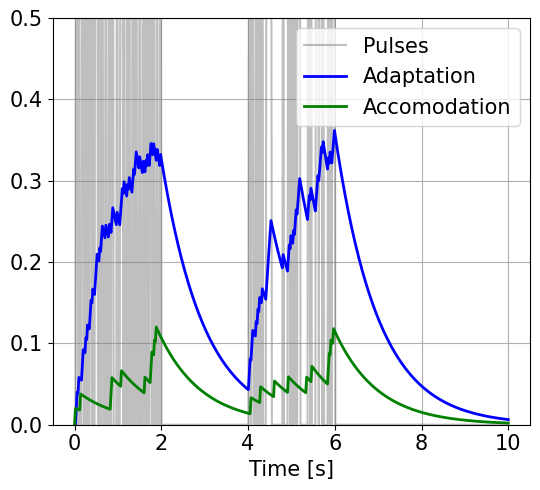

In [13]:
t = np.linspace(0, 10, 500)
dt = t[1] - t[0]

input_signal = np.zeros_like(t)
input_times = sorted(np.random.uniform(0, 2, size=50))

for pulse_time in input_times:
    input_signal[np.abs(t - pulse_time).argmin()] = 1

input_times = sorted(np.random.uniform(4, 6, size=50))
for pulse_time in input_times:
    input_signal[np.abs(t - pulse_time).argmin()] = 1

spikes = np.zeros_like(t)
input_times = sorted(np.random.uniform(0, 2, size=10))

for pulse_time in input_times:
    spikes[np.abs(t - pulse_time).argmin()] = 1

input_times = sorted(np.random.uniform(4, 6, size=10))
for pulse_time in input_times:
    spikes[np.abs(t - pulse_time).argmin()] = 1

# Parameters for the leaky integrator
tau = 1.0  # time constant
leak = 1 / tau

# Output signal: leaky integration of the input
output = np.zeros_like(t)
output2 = np.zeros_like(t)
for i in range(1, len(t)):
    output[i] = output[i-1] + dt * (-leak * output[i-1] + input_signal[i])
    output2[i] = output2[i-1] + dt * (-leak * output2[i-1] + spikes[i])

# Plotting
plt.figure(figsize=(5.5, 5))
plt.plot(t, input_signal, label='Pulses', color='gray', alpha=.5)
plt.plot(t, output, label='Adaptation', color='blue', linewidth=2.0)
plt.plot(t, output2, label='Accomodation', color='green', linewidth=2.0)

plt.xlabel('Time [s]', fontsize=15)
plt.ylim(0, .5)
plt.grid()
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("leaky.png", dpi=100)

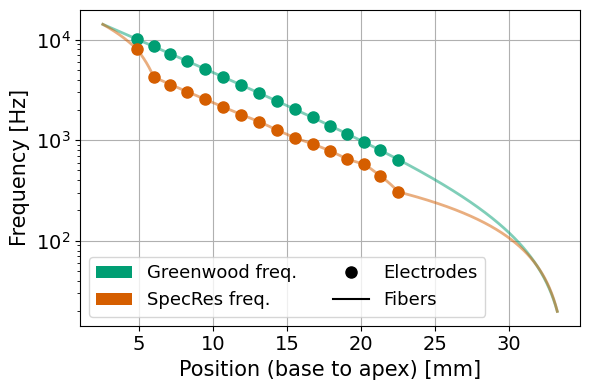

In [ ]:
# fiber_freq = get_fiber_freq_position(tp, 150, 10_500)
# electrode_freq = phast.scs.ab.defaults.virtual_channel_frequencies(tp.electrode.position.size, False)

from phast.scs.ab.defaults import ELECTRODE_FREQ_LOWER, ELECTRODE_FREQ_UPPER
electrode_freq = np.r_[ELECTRODE_FREQ_LOWER, ELECTRODE_FREQ_UPPER[-1]]
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fiber_freq = np.interp(
    tp.position[::-1], 
    np.r_[tp.position[-1], tp.electrode.position[::-1], tp.position[0]], 
    np.r_[tp.greenwood_f.max(), electrode_freq[::-1], tp.greenwood_f.min()], 
)[::-1]


f, (ax1) = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)
line1 = '#009E73'  # Slate Blue
line2 = '#D55E00'  # Aqua Mint

ax1.plot(tp.electrode.position, tp.electrode.greenwood_f, marker='o', label="Greenwood Freq.", color=line1, linestyle='none', markersize=8)
ax1.plot(tp.electrode.position, electrode_freq, marker='o', label="Specres Freq.", color=line2, markersize=8, linestyle='none',)

ax1.plot(tp.position, tp.greenwood_f, label="Greenwood (Fiber)",  color=line1, alpha=.5, lw=2,)
ax1.plot(tp.position, fiber_freq, label="Specres 120 (Fiber)",  color=line2, alpha=.5, lw=2,)


ax1.set_yscale("log")
ax1.grid()

ax1.set_xlabel("Position (base to apex) [mm]", fontsize=15)
ax1.set_ylabel("Frequency [Hz]", fontsize=15)

custom_lines = [
    Patch(facecolor=line1, label='Greenwood freq.'),
    Patch(facecolor=line2, label='SpecRes freq.'),
    Line2D([0], [0], color='black', lw=2, label='Electrodes', marker='o', linestyle='none', markersize=8),
    Line2D([0], [0], color='black', label='Fibers'),
]

ax1.legend(handles=custom_lines, ncol=2, fontsize=13)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout();
plt.savefig("fiber_freq.png", dpi=400)


<Axes: ylabel='Density'>

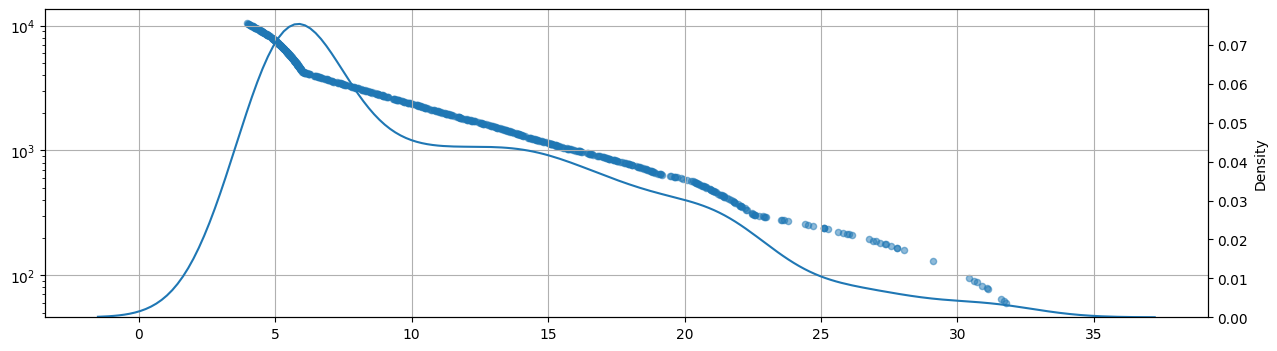

In [15]:
from run_reconstruction import select_fibers

min_freq = 150
max_freq = 10_500
n_mels = 64
mel_scale = librosa.filters.mel_frequencies(n_mels, fmin=min_freq, fmax=max_freq)

selected_fibers = select_fibers(fiber_freq, mel_scale)
plt.figure(figsize=(15, 4))
plt.scatter(tp.position[selected_fibers], fiber_freq[selected_fibers], alpha=.5, s=20)
plt.yscale("log")
plt.grid()

import seaborn as sns

plt.twinx()
sns.kdeplot(tp.position[selected_fibers])

In [16]:
mel_scale = librosa.filters.mel_frequencies(n_mels, fmin=min_freq, fmax=max_freq)

In [17]:
ng_phast, dt_ng_phast, *_ = generate_specres(robin_sound)

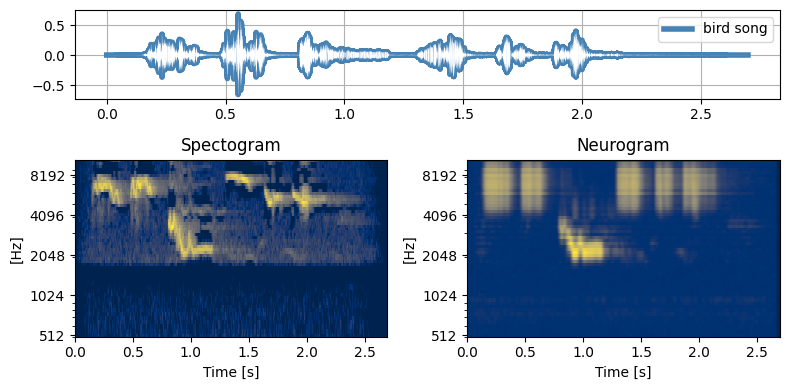

In [18]:
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(2, 2,  height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(np.arange(len(y)) * (1/sr), y, label='bird song', color='#4682B4', linewidth=4)
ax1.plot(np.arange(len(y)) * (1/sr), y, color='white', linewidth=.05)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(gs[1, 0])
t = np.arange(S_db.shape[1]) * hops * (1 / sr)
cmap = 'cividis'

ax2.pcolormesh(
    t, bg.mel_scale, S_db, cmap=cmap
)

ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
# t = np.arange(bg.data.shape[1]) * bg.ng.bin_width,

sp_data_phast = np.vstack(
    [
        scipy.signal.resample(ng_phast[i], S_db.shape[1])
        for i in range(bg.data.shape[0])
    ]
)

img = ax3.pcolormesh(
    t, bg.mel_scale, sp_data_phast, cmap=cmap
)


# img = ax3.pcolormesh(
#     np.arange(bg.data.shape[1]) * bg.ng.bin_width, bg.mel_scale, bg.data, cmap=cmap
# )
ax2.set_title("Spectogram")
ax3.set_title("Neurogram")

ax2.set_ylabel("[Hz]")
ax2.set_yscale("log")
ax2.set_yticks([pow(2, i) for i in range(9, 14)], [pow(2, i) for i in range(9, 14)])
ax2.set_ylim(500, None)
ax2.set_xlim(0, np.max(t))

# ax1.set_ylabel("amplitude")
ax3.set_ylabel("[Hz]")

for ax in ax2, ax3:
    ax.set_xlabel("Time [s]")
plt.tight_layout()

fig.savefig("specres_neurogram_robin.png", dpi=1200)


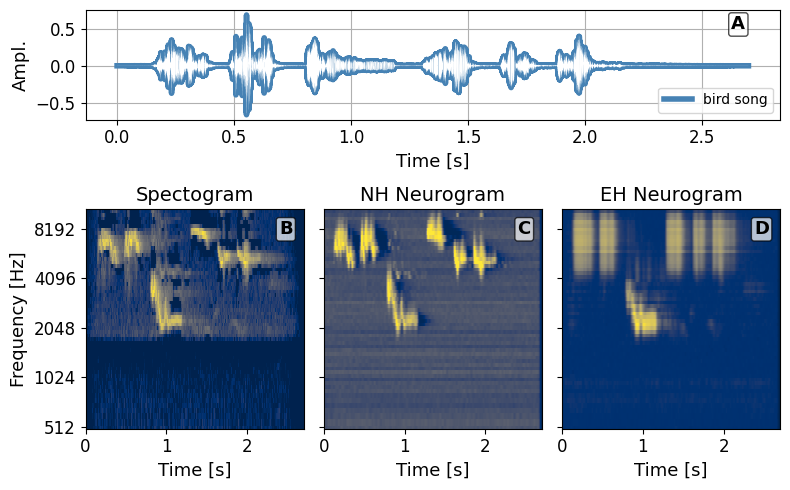

In [58]:
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2, 3,  height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(np.arange(len(y)) * (1/sr), y, label='bird song', color='#4682B4', linewidth=4)
ax1.plot(np.arange(len(y)) * (1/sr), y, color='white', linewidth=.05)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(gs[1, 0])
t = np.arange(S_db.shape[1]) * hops * (1 / sr)
cmap = 'cividis'

img2 = ax2.pcolormesh(
    t, bg.mel_scale, S_db, cmap=cmap
)
# fig.colorbar(img2, ax=ax2, orientation="horizontal", location='top')

ax2.set_ylabel("Frequency [Hz]", fontsize=13)
ax2.set_ylim(500, None)
ax2.set_yscale("log", base=2)
ax2.set_yticks([pow(2, i) for i in range(9, 14)], [pow(2, i) for i in range(9, 14)], fontsize=12)
ax2.set_xlim(0, np.max(t))

ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
img3 = ax3.pcolormesh(
    t, bg.mel_scale, sp_data, cmap=cmap, vmax=1
)

# fig.colorbar(img3, ax=ax3,  orientation="horizontal", location='top')

ax4 = fig.add_subplot(gs[1, 2], sharex=ax2, sharey=ax2)

img4 = ax4.pcolormesh(
    t, bg.mel_scale, sp_data_phast, cmap=cmap, vmax=1
)
# fig.colorbar(img4, ax=ax4, orientation="horizontal", location='top')
ax2.set_title("Spectogram", fontsize=14)
ax3.set_title("NH Neurogram", fontsize=14)
ax4.set_title("EH Neurogram", fontsize=14)

for ax in ax3, ax4:
    ax.tick_params(labelleft=False)
    


ax1.set_ylabel("Ampl.", fontsize=13)
# ax4.set_ylabel("[Hz]")

for ax, label in zip((ax1, ax2, ax3, ax4), "ABCD"):
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel("Time [s]", fontsize=13)
    ax.text(0.95, 0.95, label,
        transform=ax.transAxes,
        fontsize=13, fontweight='bold',
        va='top', ha='right',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.15'))
plt.tight_layout()

fig.savefig("robin_neurogram_combined.png", dpi=600)

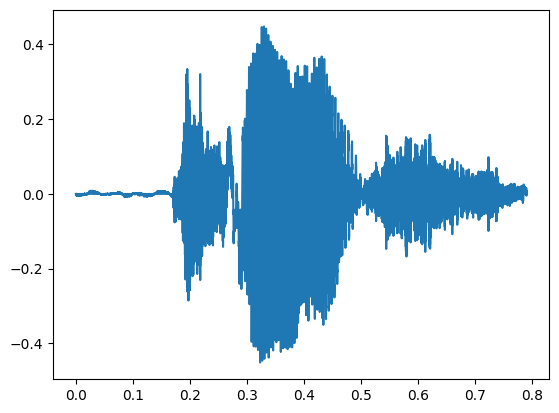

In [59]:
choice = os.path.join(data_path, "Choice.wav")
y, sr = librosa.load(choice, sr=44100)
plt.plot(np.arange(len(y)) / sr, y)

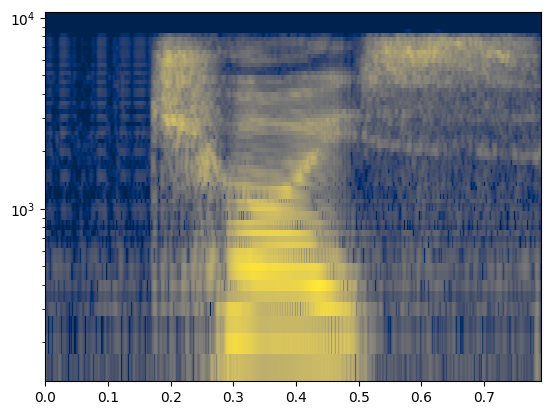

In [60]:
S_db = get_spectrogram(y, sr, N_FFT, N_HOP)

t = np.arange(S_db.shape[1]) * N_HOP * (1 / sr)
cmap = 'cividis'

plt.pcolormesh(
    t, mel_scale, S_db, cmap=cmap
)
plt.yscale("log")

In [61]:
res = reconstruct(choice, 0)
orig_specres, reconstructed_specres, fs, *_ = res

In [62]:
res = reconstruct(choice, 1)
orig_bruce, reconstructed_bruce, fs, *_ = res

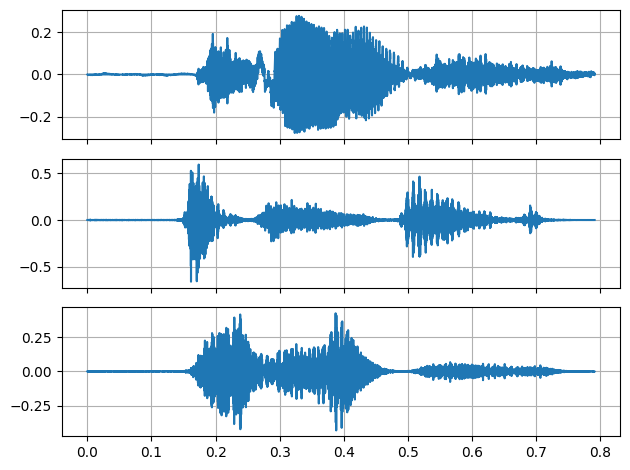

In [63]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
t = np.arange(len(orig_bruce)) / fs
ax1.plot(t, orig_bruce)
ax2.plot(t, reconstructed_bruce)
ax3.plot(t, reconstructed_specres)

for a in ax1, ax2, ax3:
    a.grid()
plt.tight_layout()

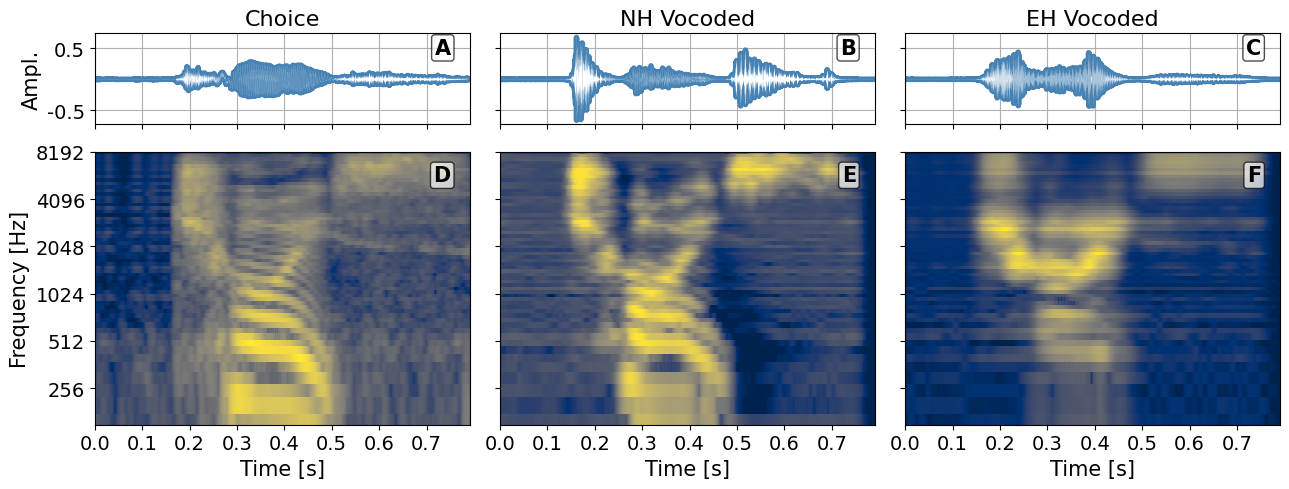

In [67]:
f, axes = plt.subplots(2, 3, sharey="row", sharex=True, figsize=(13, 5), height_ratios=[1, 3])

m = 2
fs = 16000  * m
N_FFT = 512 
N_HOP = 32

for ((ax1, ax2), y, title) in zip(axes.T, (orig_bruce, reconstructed_bruce, reconstructed_specres), ("Choice", "NH Vocoded", "EH Vocoded")):
    y = librosa.resample(y.copy(), orig_sr=16000, target_sr=fs)
    t_sound = np.arange(len(y)) / fs   
    ax1.plot(t_sound, y, color='#4682B4', linewidth=4)
    ax1.plot(t_sound, y, color='white', linewidth=.05)
    spectrogram = get_spectrogram(y, fs, N_FFT * m, N_HOP * m)
    t_spec = np.arange(spectrogram.shape[1]) * N_HOP*m * (1 / fs)
    ax2.pcolormesh(t_spec, mel_scale, spectrogram, vmin=-80, vmax=0, cmap=cmap)
    ax1.set_title(title, fontsize=16)
    ax1.set_yticks([-.5, .5], [-.5, .5], fontsize=14)
    ax2.set_xlabel("Time [s]", fontsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax1.grid()
    display(Audio(data=y, rate=fs, element_id=title))


axes[0][0].set_ylabel("Ampl.", fontsize=15)
ax2 = axes[1][0]
ax2.set_ylabel("Frequency [Hz]",  fontsize=15)
ax2.set_yscale("log", base=2)
ax2.set_yticks([pow(2, i) for i in range(8, 14)], [pow(2, i) for i in range(8, 14)], fontsize=14)
ax2.set_ylim(min_freq, 8200)
ax2.set_xlim(0, np.max(t))

for ax, label in zip(axes.ravel(), "ABCDEF"):
    ax.text(0.95, 0.95, label,
        transform=ax.transAxes,
        fontsize=15, fontweight='bold',
        va='top', ha='right',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.15'))
    
plt.tight_layout()
plt.savefig("choice_no_noise.png", dpi=600)

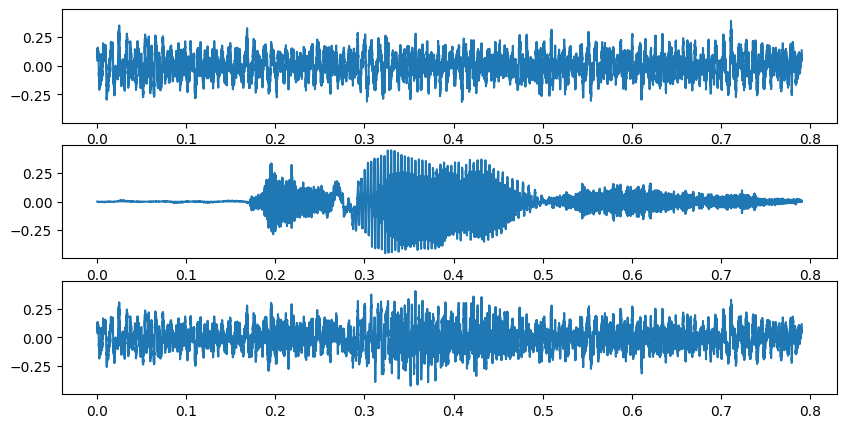

In [68]:
def rms_db(y):
    rms = np.sqrt(np.mean(y**2))
    return 20 * np.log10(rms)

def mix_v2(stim, noise, snr):
    mask = np.nonzero(stim)
    db_stim = rms_db(stim[mask])
    db_noise = rms_db(noise)
    db_tgt = db_noise + snr
    gain = 10 ** ((db_tgt - db_stim) / 20)
    stim_scaled = stim * gain
    mixed = noise + stim_scaled
    return mixed   

def scale_to_target_dbfs(y, target_dbfs):
    current_dbfs = rms_db(y)
    diff = target_dbfs - current_dbfs
    gain = 10 ** (diff / 20)
    return y * gain

# choice
snr = -4
noise = "/home/nobeljpde1/abt/data/tripletnoise.wav"
noise_y, sr = librosa.load(noise, sr=None)
choice_y, sr = librosa.load(choice, sr=sr)
noise_seg = noise_y[100:100+ len(choice_y)]
mixed = scale_to_target_dbfs(mix_v2(choice_y, noise_seg, snr), rms_db(choice_y))
t = np.arange(len(choice_y)) / sr

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5), sharey=True)
ax1.plot(t, noise_seg)
ax2.plot(t, choice_y)
ax3.plot(t, mixed)

display(Audio(data=mixed, rate=sr))
filename = f"choice_triplet{snr}db_snr.wav"
sf.write(filename, mixed, sr)

In [69]:
res = reconstruct(filename, 0)
orig_specres, reconstructed_specres, fs, *_ = res

In [70]:
res = reconstruct(filename, 1)
orig_bruce, reconstructed_bruce, fs, *_ = res

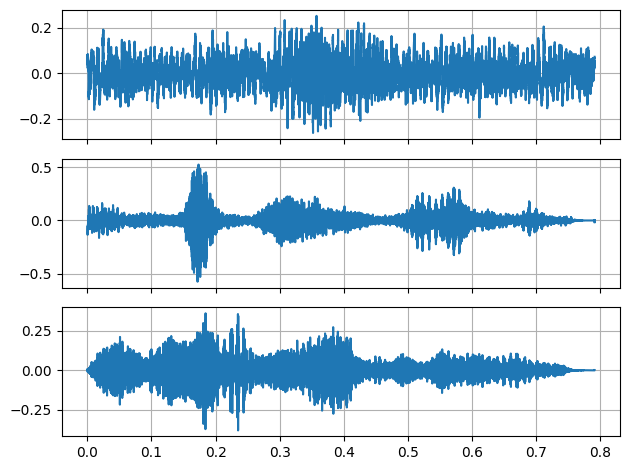

In [71]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
t = np.arange(len(orig_bruce)) / fs
ax1.plot(t, orig_bruce)
ax2.plot(t, reconstructed_bruce)
ax3.plot(t, reconstructed_specres)

for a in ax1, ax2, ax3:
    a.grid()
plt.tight_layout()

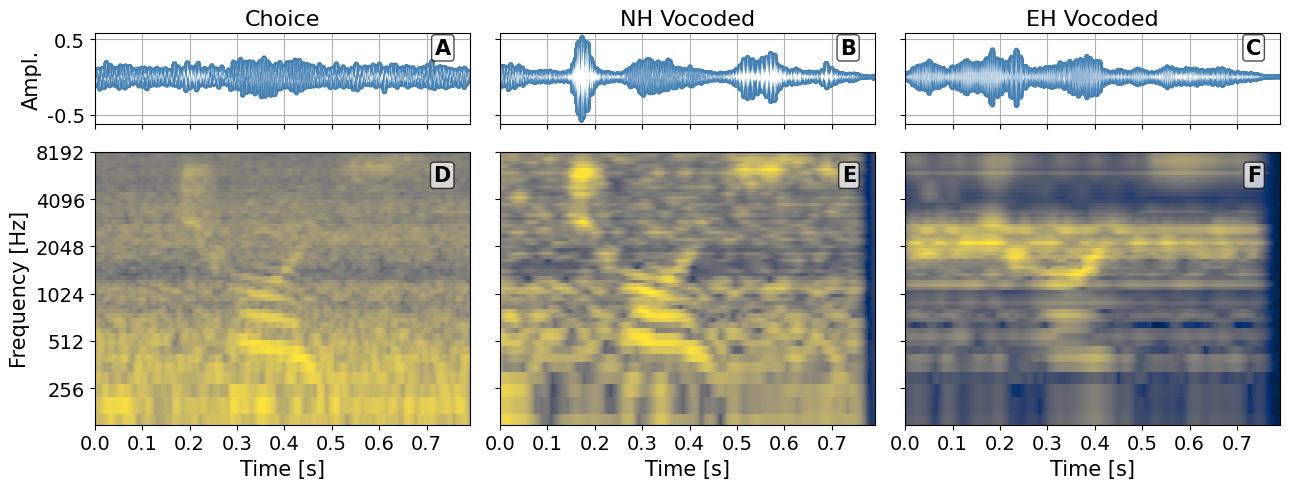

In [72]:
f, axes = plt.subplots(2, 3, sharey="row", sharex=True, figsize=(13, 5), height_ratios=[1, 3])

N_FFT = int(512  * 2.75)
N_HOP = int(32 * 2.75)

for ((ax1, ax2), y, title) in zip(axes.T, (orig_bruce, reconstructed_bruce, reconstructed_specres), ("Choice", "NH Vocoded", "EH Vocoded")):
    # y = librosa.resample(y, orig_sr=16000, target_sr=fs)
    t_sound = np.arange(len(y)) / fs   
    ax1.plot(t_sound, y, color='#4682B4', linewidth=4)
    ax1.plot(t_sound, y, color='white', linewidth=.05)
    spectrogram = get_spectrogram(y, fs, N_FFT, N_HOP)
    t_spec = np.arange(spectrogram.shape[1]) * N_HOP * (1 / fs)
    ax2.pcolormesh(t_spec, mel_scale, spectrogram, vmin=-80, vmax=0, cmap=cmap)
    ax1.set_title(title, fontsize=16)
    ax1.set_yticks([-.5, .5], [-.5, .5], fontsize=14)
    ax2.set_xlabel("Time [s]", fontsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax1.grid()
    display(Audio(data=y, rate=fs, element_id=title))


axes[0][0].set_ylabel("Ampl.", fontsize=15)
ax2 = axes[1][0]
ax2.set_ylabel("Frequency [Hz]",  fontsize=15)
ax2.set_yscale("log", base=2)
ax2.set_yticks([pow(2, i) for i in range(8, 14)], [pow(2, i) for i in range(8, 14)], fontsize=14)
ax2.set_ylim(min_freq, 8200)
ax2.set_xlim(0, np.max(t))

for ax, label in zip(axes.ravel(), "ABCDEF"):
    ax.text(0.95, 0.95, label,
        transform=ax.transAxes,
        fontsize=15, fontweight='bold',
        va='top', ha='right',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.15'))
    
plt.tight_layout()
plt.savefig(f"choice_noise_{snr}db.png", dpi=600)

In [ ]:
bg = BruceGenerator()
bg(filename)

(array([[7.69820499e-01, 7.69640778e-01, 7.69459319e-01, ...,
         3.29272087e-08, 5.48788417e-09, 0.00000000e+00],
        [5.54512474e-01, 5.54946671e-01, 5.55380735e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.25039922e-01, 9.25322345e-01, 9.25604096e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [4.76039855e-01, 4.75817022e-01, 4.75594187e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.51334535e-01, 4.51119543e-01, 4.50904462e-01, ...,
         2.19514404e-08, 5.48788417e-09, 0.00000000e+00],
        [3.28991356e-01, 3.28866950e-01, 3.28742547e-01, ...,
         5.48788417e-09, 0.00000000e+00, 0.00000000e+00]]),
 3.6e-05,
 150,
 10500,
 64)

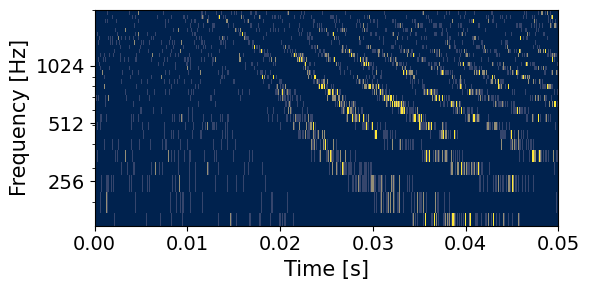

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))
spikes = bg.spikes.sum(axis=1)

ax.pcolormesh(np.arange(spikes.shape[1]) * bg.ng.bin_width, mel_scale, spikes, cmap=cmap, vmin=0.5, vmax=3)
ax.set_xlim(0, 0.05)
ax.set_yscale("log")
ax.set_ylabel("Frequency [Hz]",  fontsize=15)
ax.set_yticks([pow(2, i) for i in range(8, 14)], [pow(2, i) for i in range(8, 14)], fontsize=14)
ax.set_ylim(min_freq, 2000)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("Time [s]", fontsize=15);
plt.tight_layout()
plt.savefig("choice_bruce_ng_zoomed.png", dpi=600)

In [ ]:
def generate_specres_spikes(path):
    n_trials = 20
    cs = True
    apply_premph = False
    min_freq = 150
    max_freq = 10_500
    n_mels = 64
    mel_scale = librosa.filters.mel_frequencies(n_mels, fmin=min_freq, fmax=max_freq)
    positional_freq = True
    tp = phast.load_df120()
    
    assert max_freq > phast.scs.ab.defaults.ELECTRODE_FREQ_UPPER[-1]
    
    if positional_freq:
        fiber_freq = get_fiber_freq_position(tp)
    else:
        fiber_freq = get_fiber_freq_specres(tp, max_freq)

    selected_fibers = select_fibers(fiber_freq, mel_scale)
    fiber_freq = fiber_freq[selected_fibers]
    
    audio_signal, audio_fs = phast.scs.ab.frontend.read_wav(path, stim_db=REF_DB)
    audio_signal += np.random.normal(0, 1e-20, size=len(audio_signal))
    if apply_premph:
        audio_signal = pre_emphasis(audio_signal[0]).reshape(1, -1)

    (audio_signal, FS), pulse_train, neurogram = phast.ab_e2e(
        audio_signal=audio_signal,
        audio_fs=audio_fs,
        tp=tp,
        current_steering=cs,
        scaling_factor=1.4,
        ramp_duration=(audio_signal.size / audio_fs) * 0.05,
        n_trials=n_trials,
        accommodation_amplitude=0.07,
        adaptation_amplitude=7.142,
        accommodation_rate=2,
        adaptation_rate=19.996,
        selected_fibers=selected_fibers,
        spont_activity=SR_PHAST,
        n_jobs=10 if not TESTING else -1,
        stim_db=REF_DB
    )
    audio_signal = audio_signal[0]
    neurogram_data = neurogram.data #/ n_trials
    binned_data = utils.bin_over_y(
        neurogram_data, fiber_freq, mel_scale, agg=np.sum
    )
    return binned_data

spikes_sr = generate_specres_spikes(filename)

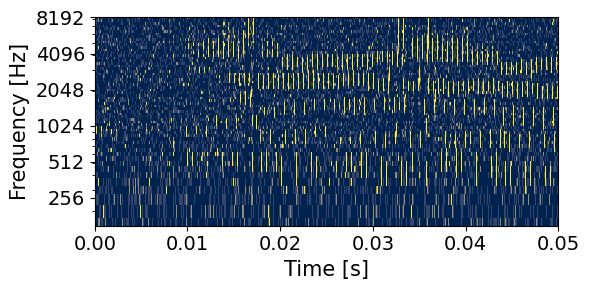

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))

ax.pcolormesh(np.arange(spikes_sr.shape[1]) * bg.ng.bin_width, mel_scale, spikes_sr, cmap=cmap, vmin=0.5, vmax=3)
ax.set_xlim(0, 0.05)
ax.set_yscale("log")
ax.set_ylabel("Frequency [Hz]",  fontsize=15)
ax.set_yticks([pow(2, i) for i in range(8, 14)], [pow(2, i) for i in range(8, 14)], fontsize=14)
ax.set_ylim(min_freq, 8200)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel("Time [s]", fontsize=15);
plt.tight_layout()
plt.savefig("choice_specres_ng_zoomed.png", dpi=600)

In [83]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def compute_mcd(y1, y2):
    """
    Compute MCD between two MFCC matrices using DTW alignment.
    """
    # Exclude 0th coefficient (energy)
    mfcc1 = librosa.feature.mfcc(y=y1, sr=sr, n_mfcc=13, hop_length=512)
    mfcc2 = librosa.feature.mfcc(y=y2, sr=sr, n_mfcc=13, hop_length=512)
    
    mfcc1 = mfcc1[1:].T  # shape: (frames, coefficients)
    mfcc2 = mfcc2[1:].T

    # Use DTW to align sequences
    distance, path = fastdtw(mfcc1, mfcc2, dist=euclidean)

    # Compute MCD over aligned path
    mcd_total = 0.0
    for i, j in path:
        diff = mfcc1[i] - mfcc2[j]
        mcd_total += np.sqrt(np.sum(diff ** 2))

    mcd_const = 10.0 / np.log(10) * np.sqrt(2)
    return mcd_const * mcd_total / len(path)

In [ ]:
import pandas as pd
stats = []
for file in os.listdir(normal_triplets):
    normal_trip = os.path.join(normal_triplets, file)
    norm_y, sr = librosa.load(normal_trip, sr=None)
    norm_y = scale_to_target_dbfs(norm_y, -20)
    record = [file]
    for folder, label in zip(
        (bruce_triplets, specres_triplets), 
        ("burce", "specres")
    ):
        fpath = os.path.join(folder, file)
        fy, _ = librosa.load(fpath, sr=sr)
        fy = scale_to_target_dbfs(fy, -20)
        distance, path = fastdtw(norm_y, fy)
        p1, p2 = np.array(path).T
        
        ny_aligned = norm_y[p1]
        fy_aligned = fy[p2]
        rmse = np.mean((ny_aligned - fy_aligned)**2)
        mcd = compute_mcd(ny_aligned, fy_aligned)
        record.extend([distance, rmse, mcd])
    stats.append(record)
    
stats = pd.DataFrame(stats, columns=[
    "file", 
    "bruce_abs_dist", "bruce_rmse", "bruce_mcd",
    "specres_abs_dist", "specres_rmse", "specres_mcd"
])
